In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
data = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/House Prediction/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print 'Number of Features: {}'.format(data.shape[1])
print 'Number of Samples: {}'.format(data.shape[0])

Number of Features: 81
Number of Samples: 1460


In [5]:
categorical = []
for col in data.columns:
    if data[col].dtype == 'object':
        print '{} is categorical'.format(col)
        categorical.append(col)
print 'Number of categorical features: {}'.format(len(categorical))

MSZoning is categorical
Street is categorical
Alley is categorical
LotShape is categorical
LandContour is categorical
Utilities is categorical
LotConfig is categorical
LandSlope is categorical
Neighborhood is categorical
Condition1 is categorical
Condition2 is categorical
BldgType is categorical
HouseStyle is categorical
RoofStyle is categorical
RoofMatl is categorical
Exterior1st is categorical
Exterior2nd is categorical
MasVnrType is categorical
ExterQual is categorical
ExterCond is categorical
Foundation is categorical
BsmtQual is categorical
BsmtCond is categorical
BsmtExposure is categorical
BsmtFinType1 is categorical
BsmtFinType2 is categorical
Heating is categorical
HeatingQC is categorical
CentralAir is categorical
Electrical is categorical
KitchenQual is categorical
Functional is categorical
FireplaceQu is categorical
GarageType is categorical
GarageFinish is categorical
GarageQual is categorical
GarageCond is categorical
PavedDrive is categorical
PoolQC is categorical
Fence 

In [6]:
ordinal = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',\
           'Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond',\
          'PavedDrive','PoolQC','Fence','BsmtFinType2']

In [7]:
nominal = []
for col in categorical:
    if col not in ordinal:
        nominal.append(col)
print 'Number of Nominal Features: {}'.format(len(nominal))
print 'Number of Ordinal Features: {}'.format(len(ordinal))

Number of Nominal Features: 23
Number of Ordinal Features: 20


In [8]:
temp = pd.get_dummies(data[[i for i in nominal]])
train = pd.concat([data,temp],axis=1)
train.drop(nominal,axis=1,inplace=True)

In [9]:
import gc
del data
gc.collect()

1168

In [10]:
for col in ordinal:
    train[col] = train[col].astype('category').cat.codes

In [11]:
train = train.fillna(method='ffill')
train.isnull().values.any()

False

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 223 entries, Id to SaleCondition_Partial
dtypes: float64(168), int64(35), int8(20)
memory usage: 2.3 MB


In [13]:
y = train.pop('SalePrice')
Id = train.pop('Id')
y = np.log1p(y)
print train.shape,y.shape

(1460, 221) (1460,)


In [14]:
def rmse(estimator,X,y):
    return np.sqrt(mean_squared_error(y,estimator.predict(X)))

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(1022, 221) (1022,)
(438, 221) (438,)


In [24]:
model.fit(X_train,y_train)
print 'Training RMSE: {}'.format(round(rmse(model,X_train,y_train),3))
print 'Testing RMSE: {}'.format(round(rmse(model,X_test,y_test),3))

Training RMSE: 0.054
Testing RMSE: 0.145


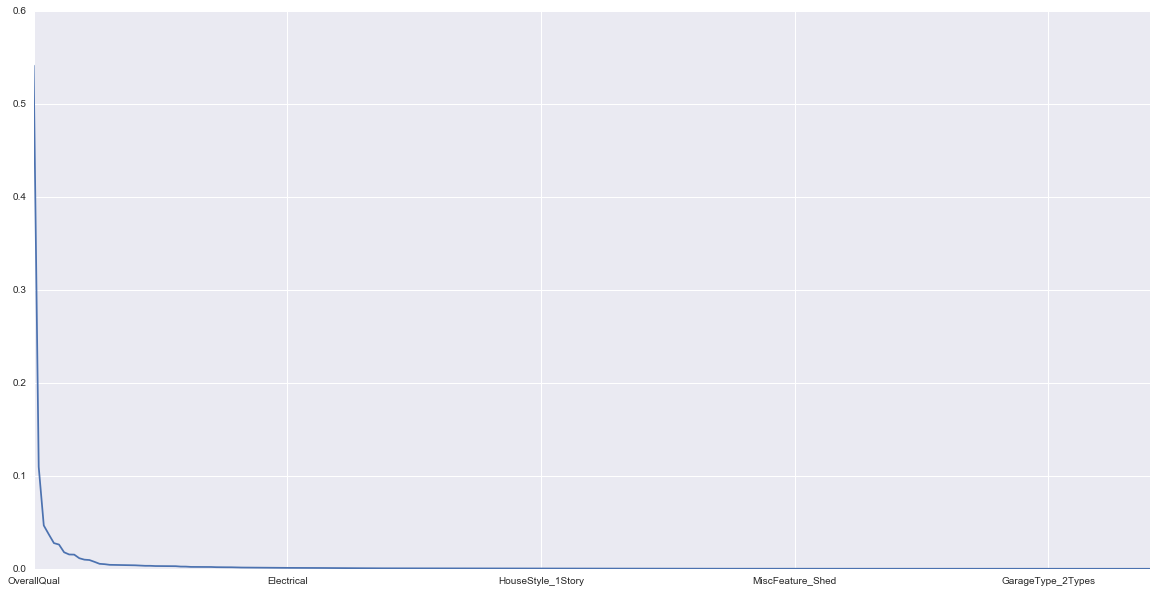

In [29]:
important = pd.Series(model.feature_importances_,index=train.columns).sort_values(ascending=False)
important.plot()

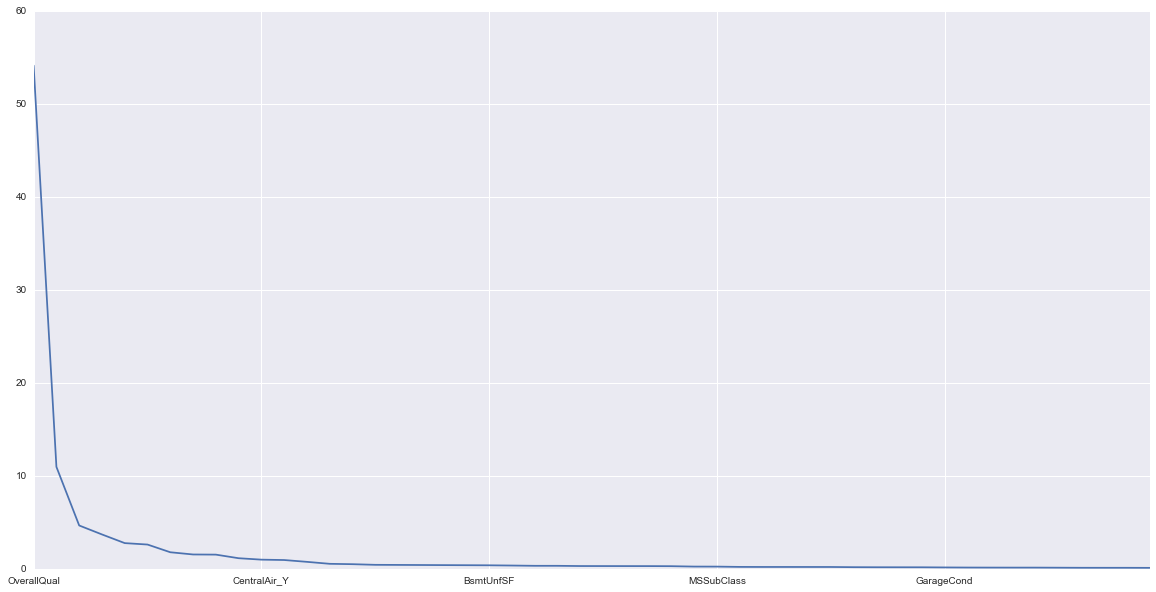

In [39]:
(important[0:50]*100).plot()

In [44]:
train_copy = train.copy()
count = 0
imp_features = important[0:50]
for col in train.columns:
    if col not in imp_features:
        train_copy.pop(col)

In [45]:
train_copy.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MSZoning_C (all),MSZoning_RM,Condition1_Norm,BldgType_1Fam,Exterior2nd_VinylSd,BsmtQual_Ex,CentralAir_N,CentralAir_Y,GarageType_Attchd,GarageType_Detchd
0,60,65.0,8450,3,7,5,2003,2003,196.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,20,80.0,9600,3,6,8,1976,1976,0.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,60,68.0,11250,0,7,5,2001,2002,162.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,70,60.0,9550,0,7,5,1915,1970,0.0,3,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,60,84.0,14260,0,8,5,2000,2000,350.0,2,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [51]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=7)
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)
print 'Training RMSE: {}'.format(round(rmse(model,X_train,y_train),3))
print 'Testing RMSE: {}'.format(round(rmse(model,X_test,y_test),3))

Training RMSE: 0.055
Testing RMSE: 0.141
